In [1]:
# Ignore warnings (primarily for future deprecation warnings)
import warnings
warnings.filterwarnings('ignore')

# Raster Analysis
import rasterio
import earthpy.plot as ep
from rasterio.merge import merge

# Vector Analysis
from shapely.geometry import box, mapping, Polygon

# General data manipulation
import geopandas as gpd
import pandas as pd
import numpy as np

# Saving and Accessing Data
import os
import pickle
import json

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import folium
import seaborn as sns

# Google Earth Engine
import ee
import geemap

# Machine learning

# Keras
import keras
from keras import Sequential
from keras.layers import Conv1D, Dropout, Dense, Input, GlobalMaxPooling1D
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical

from importlib import reload
from tqdm import tqdm

import sys
# caution: path[0] is reserved for script path (or '' in REPL)
sys.path.insert(1, os.path.join('src'))

from split_images import split_geometry, haversine, calc_segment_count
import feature_extraction as fe

from analysis_image import AnalysisImage
from keras.preprocessing import image

from eloisa import Eloisa

In [2]:
import analysis_image
reload(analysis_image)
from analysis_image import AnalysisImage

In [3]:
ee.Authenticate()
ee.Initialize()

In [4]:
SEED = 2024
keras.utils.set_random_seed(SEED)
FEATURES = ['B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B11', 'B12']
years = [2018, 2019, 2020, 2021, 2022, 2023]

In [57]:
import time

In [5]:
for year in [2022]:
    try:
        tegucigalpa_image = AnalysisImage(presets='Tegucigalpa', year=year, feature_bands=FEATURES)

        img_height = haversine(coords=tegucigalpa_image.get_bounds(side='ceiling'))
        img_width = haversine(coords=tegucigalpa_image.get_bounds(side='left'))

        x_num_parts, y_num_parts = calc_segment_count(img_height, img_width, 200, 200)

        folder_path = os.path.join('image_clips', 'tegucigalpa', '200x200', str(year))
        files = tegucigalpa_image.extract_clips_to_folder(folder_path, 'tegucigalpa', x_num_parts, y_num_parts, continue_preexisting=True)

    except Exception as e:
        print(f"Failed at year {year}")
        print(f"Error: {e}")
        # time.sleep(1800)

100%|██████████| 3468/3468 [39:52<00:00,  1.45it/s] 


In [5]:
from tensorflow.keras.applications import EfficientNetB7 as effnet
from tensorflow.keras.applications.efficientnet import preprocess_input as effnet_p

In [5]:
from tensorflow.keras.applications import ResNet152V2 as resnet
from tensorflow.keras.applications.resnet_v2 import preprocess_input as resnet_p

In [9]:
tegu_200_TESTING = Eloisa(name="tegu_200x200_TESTING", db_folder="eloisa_databases", seed=SEED, image_shape=(200, 200, 3))

The database already exists. Connecting to it.


100%|██████████| 600/600 [00:33<00:00, 18.17it/s]


In [105]:
tegu_200_TESTING = Eloisa(name="tegu_200x200_TESTING", db_folder="eloisa_databases", seed=SEED, image_shape=(200, 200, 3))

years = [2018, 2019, 2020, 2021, 2022, 2023]
for year in tqdm(years):
    try:
        
        folder_path = os.path.join('image_clips', 'tegucigalpa', '200x200_TESTING', str(year))
        tegu_200_TESTING.import_images_by_year(folder_path=folder_path, year=year, bands=[1, 2, 3])



    except Exception as e:
        print(f"Failed at year {year}")
        print(f"Error: {e}")
        continue

tegu_200_TESTING.extract_features_multiyear(years=years, model=resnet, preprocess_input=resnet_p)

tegu_200_TESTING.update_database()

tegu_200_TESTING.close_db()

The database does not yet exist. Creating it.


100%|██████████| 6/6 [00:31<00:00,  5.21s/it]


19/19 ━━━━━━━━━━━━━━━━━━━━ 167s 8s/step


IndexError: list index out of range

In [48]:
tegu_200_TESTING.get_data()[2019]['ResNet152V2']

,0,1,2,3,4,5,6,7,8,9,...,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034
100,0.235034,0.000000,0.000000,0.381407,0.805939,0.127634,0.000000,0.006020,0.004907,1.426103,...,0.059892,0.101483,0.000000,0.000000,0.000000,0.000000,2.211880,0.096679,0.408302,0.000000
101,0.212741,0.008099,0.000000,0.642988,0.047127,0.011109,0.000000,0.000000,0.021525,0.918661,...,0.248944,1.666984,0.000000,0.094535,0.057482,0.000996,0.264969,0.024895,0.718862,0.002497
102,1.322607,0.000000,0.000000,0.090473,0.049779,0.215551,0.013173,0.000000,0.061979,1.467376,...,2.415911,1.245733,0.000000,0.000000,0.067745,0.009942,0.260488,0.000000,0.000000,0.115435
103,1.408940,0.000000,0.000000,0.202951,0.110417,0.259634,0.000000,0.001966,0.042109,2.240468,...,1.156658,0.897142,0.000000,0.000000,0.243998,0.015689,0.000000,0.023312,0.440028,0.020124
104,1.961145,0.048356,0.000000,0.941142,0.022628,0.000000,0.027479,0.006190,0.004338,2.495722,...,0.484545,0.807435,0.000000,0.265265,0.000000,0.000000,0.008876,0.067040,0.178010,0.490669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.019859,0.129855,0.000000,0.123668,0.000000,0.000000,0.000000,0.011103,0.002032,2.963229,...,1.131627,0.018678,0.000000,0.000000,0.000000,0.000000,0.000000,0.075797,0.727657,0.000000
196,0.357179,0.092368,0.146981,0.010220,0.022306,0.000000,1.716582,0.000000,0.015224,0.018735,...,0.312928,0.264851,0.000000,0.161933,0.082058,0.000000,0.000000,0.370964,1.272892,0.560673
197,0.794048,0.000000,0.000000,0.000000,0.000000,0.000000,0.051656,0.001072,0.013872,0.917862,...,1.019536,0.013423,0.000000,0.001645,0.000000,0.000000,0.040227,0.082255,0.010989,0.000000
198,0.060350,0.080435,0.000000,0.391260,0.097493,0.000000,0.000000,0.003006,0.000000,1.378644,...,1.100446,0.788098,0.011675,0.007811,0.000259,0.000000,0.000000,0.000000,0.148919,0.000000


In [50]:
for year in tegu_200_TESTING._data:
    for model_name in tegu_200_TESTING._data[year]:
        if model_name == "image_list" or model_name[-8:] == "_cluster" or model_name[-8:] == "_reduced":
            continue

        print(f"Year: {year}, Model: {model_name}")

        features = tegu_200_TESTING._data[year][model_name]

                
        # if year == 2019:
        #     continue
        j = 0
        for i, row in features.iterrows():
            print(f"Image {i}")
            
            # print(tegu_200_TESTING.image_names[year])
            # print(len(tegu_200_TESTING.image_names[year]))
            print(tegu_200_TESTING.image_names[year][j])
            j += 1

Year: 2018, Model: ResNet152V2
Image 0
image_clips\tegucigalpa\200x200_TESTING\2018\tegucigalpa_0.tif
Image 1
image_clips\tegucigalpa\200x200_TESTING\2018\tegucigalpa_1.tif
Image 2
image_clips\tegucigalpa\200x200_TESTING\2018\tegucigalpa_10.tif
Image 3
image_clips\tegucigalpa\200x200_TESTING\2018\tegucigalpa_11.tif
Image 4
image_clips\tegucigalpa\200x200_TESTING\2018\tegucigalpa_12.tif
Image 5
image_clips\tegucigalpa\200x200_TESTING\2018\tegucigalpa_13.tif
Image 6
image_clips\tegucigalpa\200x200_TESTING\2018\tegucigalpa_14.tif
Image 7
image_clips\tegucigalpa\200x200_TESTING\2018\tegucigalpa_15.tif
Image 8
image_clips\tegucigalpa\200x200_TESTING\2018\tegucigalpa_16.tif
Image 9
image_clips\tegucigalpa\200x200_TESTING\2018\tegucigalpa_17.tif
Image 10
image_clips\tegucigalpa\200x200_TESTING\2018\tegucigalpa_18.tif
Image 11
image_clips\tegucigalpa\200x200_TESTING\2018\tegucigalpa_19.tif
Image 12
image_clips\tegucigalpa\200x200_TESTING\2018\tegucigalpa_2.tif
Image 13
image_clips\tegucigalpa\

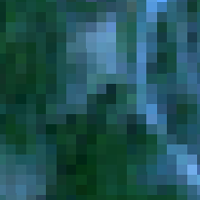

In [37]:
tegu_200_TESTING.get_data()[2019]['image_list'][0]

In [11]:
tegu_200_eloisa = Eloisa(name="tegu_200x200", db_folder="eloisa_databases", seed=SEED, image_shape=(200, 200, 3))

The database already exists. Connecting to it.


100%|██████████| 20795/20795 [26:22<00:00, 13.14it/s]


In [41]:
tegu_200_TESTING.vacuum_db()

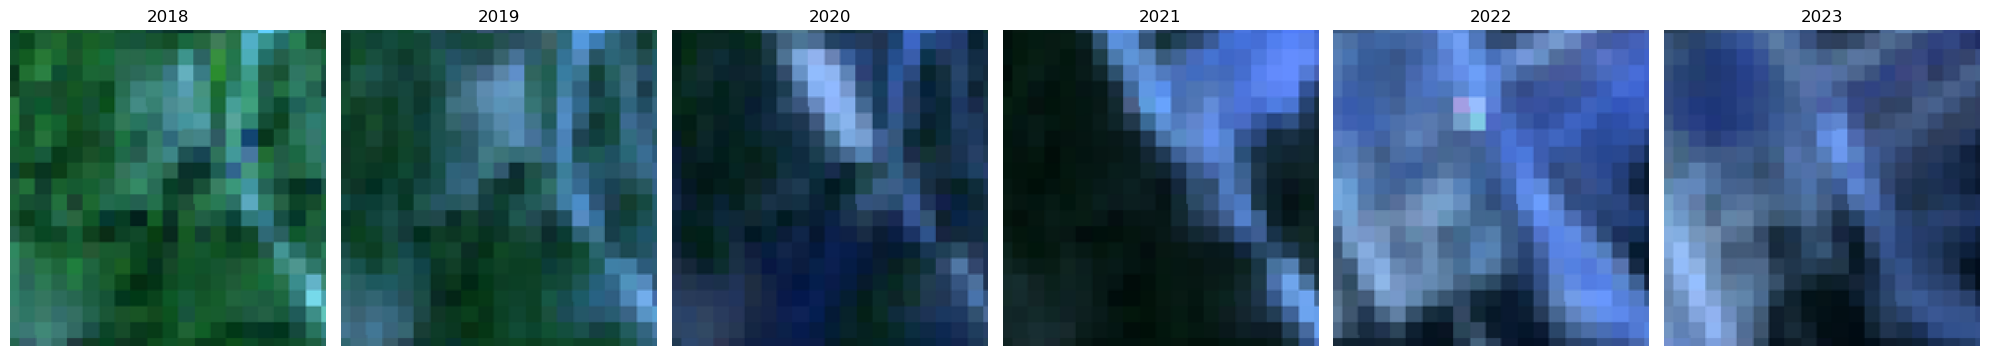

In [42]:
tegu_200_TESTING.show_clip_by_year([2018, 2019, 2020, 2021, 2022, 2023], 0)

In [47]:
tegu_200_TESTING.get_data()[2018]["ResNet152V2"]

,0,1,2,3,4,5,6,7,8,9,...,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028
0,0.767398,0.608110,0.000000,0.000000,0.057338,0.062788,0.010992,0.000000,0.014867,1.163726,...,0.186791,0.000000,0.000000,0.000000,0.000000,0.001014,0.227139,0.420534,0.055795,0.000000
1,0.834379,0.000000,0.000000,0.013591,0.000000,0.026611,0.030652,0.000000,0.007493,0.290675,...,0.097979,2.861269,0.000000,0.113881,0.000000,0.025835,0.065764,0.161099,0.303420,0.000000
2,1.324821,0.000000,0.000000,0.076761,0.234094,0.028331,0.019099,0.000000,0.051948,1.829756,...,1.222900,0.497241,0.025657,0.007430,0.037606,0.008318,0.440079,0.000000,0.670029,0.823774
3,2.495721,0.000000,0.240921,0.188961,0.000000,0.000000,0.000000,0.002463,0.029635,1.891157,...,0.100866,1.223397,0.000000,0.000000,0.223021,0.000000,0.409123,0.000000,0.346365,0.000000
4,2.161254,0.000000,0.000000,1.118679,0.169736,0.000000,0.012339,0.004305,0.000000,2.043714,...,0.453397,0.314696,0.077215,0.260821,0.023377,0.000000,0.130888,0.028989,2.203432,0.778647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.094598,0.216240,0.000000,0.069957,0.000000,0.000000,0.169584,0.003746,0.000559,3.901948,...,0.861901,1.398837,0.000000,0.000000,0.506128,0.002364,0.578942,0.275183,0.518851,0.000000
96,0.154232,0.165690,0.000000,0.099602,0.000000,0.000000,1.439823,0.000000,0.025726,0.031685,...,0.023401,0.007477,0.000000,0.057882,0.188474,0.000000,0.018570,1.794722,0.799631,0.023303
97,0.479511,0.102399,0.039444,0.000000,0.106700,0.000000,0.131063,0.000000,0.000000,1.198325,...,0.646277,0.187828,0.000000,0.000000,0.507884,0.000000,0.410167,0.168793,0.000000,0.000000
98,1.535777,0.092157,0.000000,0.854332,0.000000,0.000000,0.000000,0.000000,0.000000,0.971615,...,1.259557,1.947154,0.063957,0.039137,0.068535,0.000000,0.017608,0.001531,0.336916,0.076900


In [64]:
import eloisa
reload(eloisa)
from eloisa import Eloisa

In [65]:
tegu_200_TESTING.close_db()
tegu_200_TESTING = Eloisa(name="tegu_200x200_TESTING", db_folder="eloisa_databases", seed=SEED, image_shape=(200, 200, 3))

The database already exists. Connecting to it.


100%|██████████| 600/600 [00:19<00:00, 30.79it/s]


In [67]:
tegu_200_TESTING.extract_features_multiyear(years=years, model=resnet, preprocess_input=resnet_p)

19/19 ━━━━━━━━━━━━━━━━━━━━ 152s 7s/step


In [68]:
tegu_200_TESTING.scale_features([2018, 2019, 2020, 2021, 2022, 2023], resnet)

Year: 2018, start_idx: 0, end_idx: 100
Year: 2019, start_idx: 100, end_idx: 200
Year: 2020, start_idx: 200, end_idx: 300
Year: 2021, start_idx: 300, end_idx: 400
Year: 2022, start_idx: 400, end_idx: 500
Year: 2023, start_idx: 500, end_idx: 600


array([[ 0.05993254,  3.6709106 , -0.1985836 , ...,  0.59486574,
        -0.5846974 , -0.36010334],
       [ 0.13578553, -0.37822345, -0.1985836 , ..., -0.0873706 ,
        -0.28636494, -0.36010334],
       [ 0.69118685, -0.37822345, -0.1985836 , ..., -0.5110117 ,
         0.15531527,  4.5520067 ],
       ...,
       [-0.6377646 ,  0.6252599 , -0.1985836 , ..., -0.5110117 ,
        -0.6519176 , -0.36010334],
       [ 0.23462409, -0.37822345, -0.1985836 , ..., -0.5110117 ,
        -0.03160659, -0.36010334],
       [-0.75422376, -0.24922219, -0.1985836 , ..., -0.05979097,
        -0.6519176 , -0.36010334]], dtype=float32)

In [71]:
tegu_200_TESTING.get_data()[2018]["ResNet152V2_reduced"]

,0,1,2,3,4,5,6,7,8,9,...,368,369,370,371,372,373,374,375,376,377
0,-13.373696,9.732073,-6.057606,2.992299,10.513783,11.621692,-6.959149,3.641551,4.484575,2.728246,...,0.588865,-0.343879,0.163683,0.243839,0.324457,-0.343993,0.115197,0.451454,0.911963,0.242858
1,-2.068542,-1.657909,-6.018381,-3.005115,-2.970461,2.148924,-2.213877,-4.701911,-5.114602,-1.686974,...,1.226303,-0.485706,0.468580,0.630859,1.830883,-0.574521,0.029162,-0.090180,-1.309732,0.495498
2,12.775445,-3.474005,19.852840,-10.779222,15.361484,21.627003,5.768267,-24.775991,12.807574,3.418166,...,0.105570,-0.060664,-0.282551,0.133893,-0.298388,0.573806,-0.313327,0.069495,-0.127124,-1.221517
3,0.448331,7.001338,-3.282029,-11.588384,0.582917,8.967714,5.026876,-7.721715,-0.709516,0.183474,...,2.675027,0.002825,0.405007,-1.003734,-0.428134,0.303280,-0.660643,-0.966708,-1.234635,-1.365505
4,16.755493,0.671888,-2.723833,2.139040,3.646794,7.474703,-2.888798,-8.937574,-2.291256,-9.066325,...,1.212824,0.378175,-0.502218,-1.830915,-0.410410,0.026274,0.326917,1.286530,-1.263442,0.834141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-8.975084,-0.361382,-4.967144,-0.912332,-3.925900,5.888792,-2.050235,1.145452,-1.626813,3.169325,...,-0.188974,1.125437,-2.698181,0.467019,-0.714548,-1.361818,-0.007442,-1.085792,-1.566080,-1.388042
96,-4.037516,-2.238691,-5.804696,24.616945,4.117207,6.930054,1.944566,4.087006,9.982401,-5.583379,...,0.156305,-0.067960,0.750192,0.233386,-1.507808,-0.853399,-0.377637,1.369028,0.432721,0.264859
97,-11.126058,11.226819,-8.077365,13.662953,6.257074,4.759112,-5.997900,0.692427,2.025927,4.569658,...,-0.177679,0.208007,-0.397339,-0.944147,-0.186085,1.917529,-0.691783,0.436090,0.096926,-0.166551
98,1.625305,-10.255088,8.077742,0.360147,-1.098917,4.311064,-3.848816,-6.138903,0.936593,-0.364884,...,-0.733068,1.776167,1.076411,1.576353,0.994339,-0.269917,-0.627131,-0.095066,0.312193,-0.909897


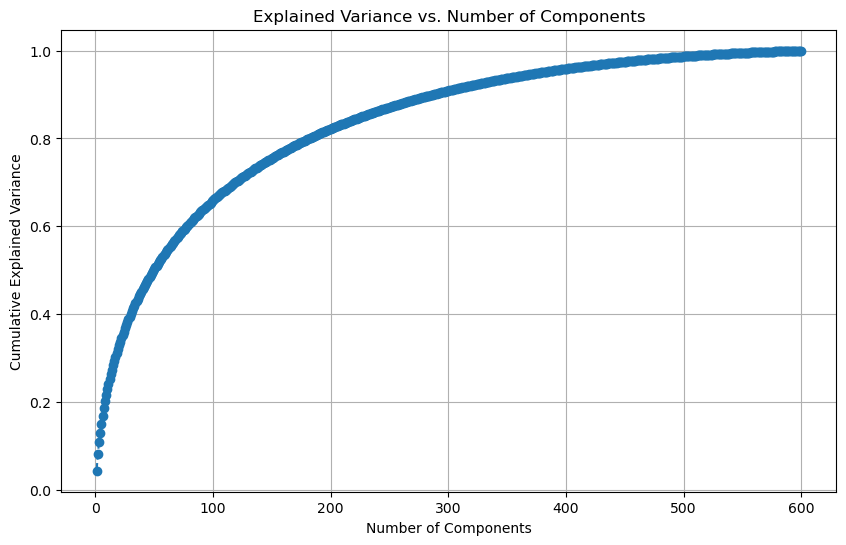

Number of components to retain 95.0% variance: 378


In [70]:
tegu_200_TESTING.pca_features(years=[2018, 2019, 2020, 2021, 2022, 2023], model=resnet, variance_min=0.95, plot_variance=True)

In [81]:
for year in tegu_200_TESTING._data:
    for model_name in tegu_200_TESTING._data[year]:
        if model_name == "image_list" or model_name[-8:] == "_cluster" or model_name[-8:] == "_reduced":
            continue

        print(f"Year: {year}, Model: {model_name}")

        features = tegu_200_TESTING._data[year][model_name]

                
        # if year == 2019:
        #     continue
        j = 0
        for i, row in features.iterrows():
            print(int(tegu_200_TESTING._data[year][model_name + "_cluster"][i]) if model_name + "_cluster" in tegu_200_TESTING._data[year] else None)

            j += 1

Year: 2018, Model: ResNet152V2


NameError: name 'self' is not defined

In [72]:
tegu_200_TESTING.update_database()

IndexError: single positional indexer is out-of-bounds